In [7]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
from LogisticRegression import LogisticRegression
from KNN import KNN
from Kfold import Kfold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
y = np.where(y == 'Cammeo', 1, 0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled
X.shape

(3810, 7)

In [8]:
logReg = LogisticRegression(0.01,1000)
kNearest = KNN(5)

In [9]:
def evaluate_acc(X,y,model,thres):
    accuracy = Kfold.kFoldTest(X,y,model,thres)
    return accuracy

The accuracy of the logistic regression is:  0.9015748031496063
The accuracy of the KNN Classifier is:  0.8522309711286089
optimal k is:  14


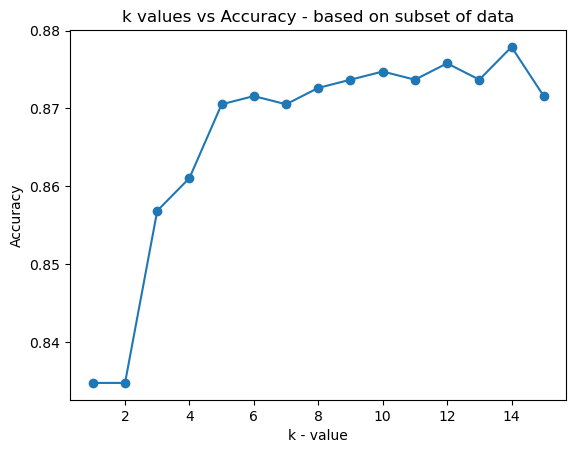

In [10]:
accuracyLog,i = evaluate_acc(X,y,logReg,0.001)
print("The accuracy of the logistic regression is: ",accuracyLog)
accuracyKNN = evaluate_acc(X,y, kNearest, None)
print("The accuracy of the KNN Classifier is: ",accuracyKNN)

# Since KNN was taking extremely long to run, i had to do reduce the number of rows in order to find the best k in the KNN algorithm

subsetIndexes = np.random.choice(len(y), int(0.25*len(y)), replace=False)
Xsubset = X[subsetIndexes]
ySubset = y[subsetIndexes]
accuraciesPlot = []
kPlot = []
bestK = 1
holder = 0
for i in range(15):
    kNearest2 = KNN(bestK)
    accuracyKNN2 = evaluate_acc(Xsubset,ySubset, kNearest2,None)
    accuraciesPlot.append(accuracyKNN2)
    kPlot.append(bestK)
    if accuracyKNN2 > holder:
        holder = accuracyKNN2
        kval = bestK
    bestK = bestK + 1

optimalK = kval
print("optimal k is: ",optimalK)
plt.plot(kPlot, accuraciesPlot, label='Line 1', marker='o')
plt.title('k values vs Accuracy - based on subset of data')
plt.xlabel('k - value')
plt.ylabel('Accuracy')
plt.show()

0.001 0.8984251968503937 1000
0.01 0.9013123359580052 970
0.1 0.9013123359580052 97


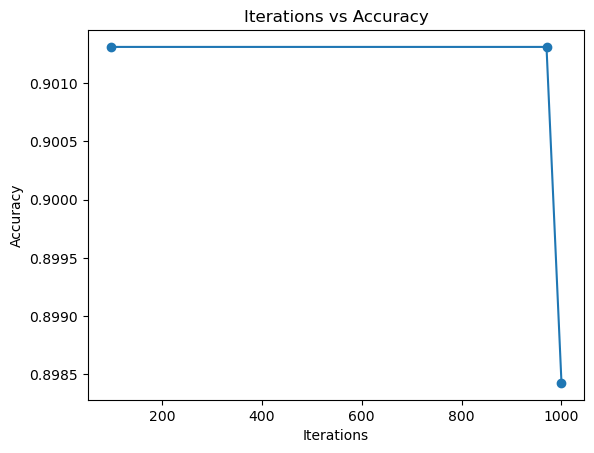

In [13]:
lrs = [0.001,0.01,0.1]
its = []
logAccs =[]
for rates in lrs:
    logReg2 = LogisticRegression(rates,1000)
    accuracyLog,iterations = evaluate_acc(X,y,logReg2,0.2)
    print(rates,accuracyLog,iterations)
    its.append(iterations)
    logAccs.append(accuracyLog)
plt.plot(its, logAccs, label='Line 1', marker='o')
plt.title('Iterations vs Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

In [12]:
#accuracy vs training size
subsetIndexesOP = np.random.choice(len(y), int(0.1*len(y)), replace=False)
Xsubset1 = X[subsetIndexesOP]
ySubset1 = y[subsetIndexesOP]

subsetIndexesFP = np.random.choice(len(y), int(0.25*len(y)), replace=False)
Xsubset2 = X[subsetIndexesFP]
ySubset2 = y[subsetIndexesFP]

subsetIndexesTP = np.random.choice(len(y), int(0.5*len(y)), replace=False)
Xsubset3 = X[subsetIndexesTP]
ySubset3 = y[subsetIndexesTP]

logReg3 = LogisticRegression(0.01,1000)
kNearest3 = KNN(5)

accuracyLogOP,i = evaluate_acc(Xsubset1,ySubset1,logReg3,0.001)
accuracyKNNOP = evaluate_acc(Xsubset1,ySubset1, kNearest3, None)

accuracyLogFP,i = evaluate_acc(Xsubset2,ySubset2,logReg3,0.001)
accuracyKNNFP = evaluate_acc(Xsubset2,ySubset2, kNearest3, None)

accuracyLogTP,i = evaluate_acc(Xsubset3,ySubset3,logReg3,0.001)
accuracyKNNTP = evaluate_acc(Xsubset3,ySubset3, kNearest3, None)

print("Accuracy with 10% of training values for logistic regression is: ",accuracyLogOP," and for KNN: ",accuracyKNNOP)
print("Accuracy with 25% of training values for logistic regression is: ",accuracyLogFP," and for KNN: ",accuracyKNNFP)
print("Accuracy with 50% of training values for logistic regression is: ",accuracyLogTP," and for KNN: ",accuracyKNNTP)

Accuracy with 10% of training values for logistic regression is:  0.9421052631578948  and for KNN:  0.8921052631578947
Accuracy with 25% of training values for logistic regression is:  0.9242105263157895  and for KNN:  0.8863157894736842
Accuracy with 50% of training values for logistic regression is:  0.9301837270341208  and for KNN:  0.8866141732283465
